In [59]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:

# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [25]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
#df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

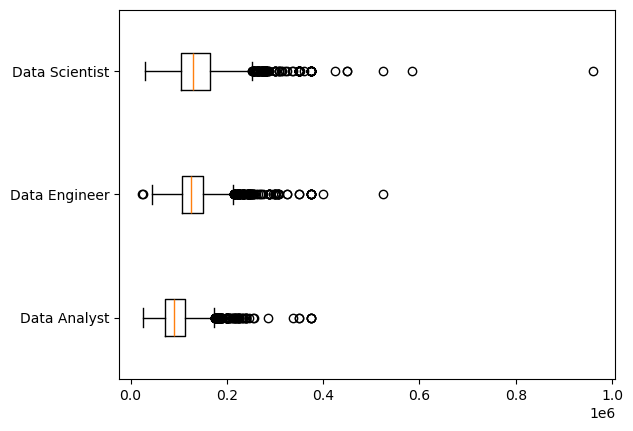

In [28]:
plt.boxplot(job_list, labels=job_titles, vert=False)


In [31]:
DA_salary = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')]

Text(0, 0.5, 'Hourly Salary ($USD)')

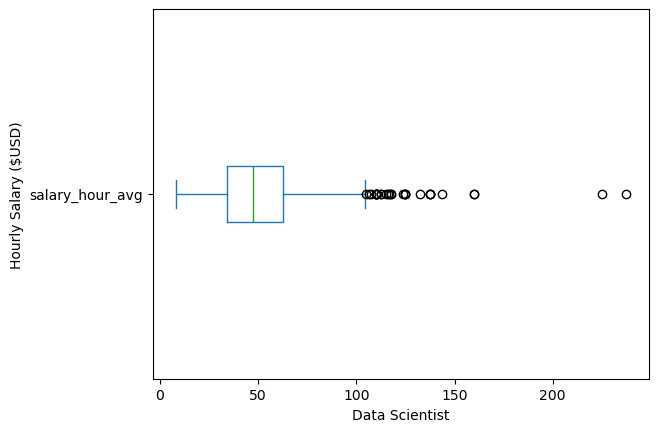

In [40]:
DA_salary['salary_hour_avg'].plot(kind='box', vert=False)
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')

In [41]:
countries = ['United States', 'Canada']

In [45]:
df_compare = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(countries))]

In [46]:
df_compare

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [47]:
country_data = [df_compare[df_compare['job_country'] == country]['salary_hour_avg'] for country in countries]

In [55]:
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

In [56]:
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

In [60]:
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])


In [61]:
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

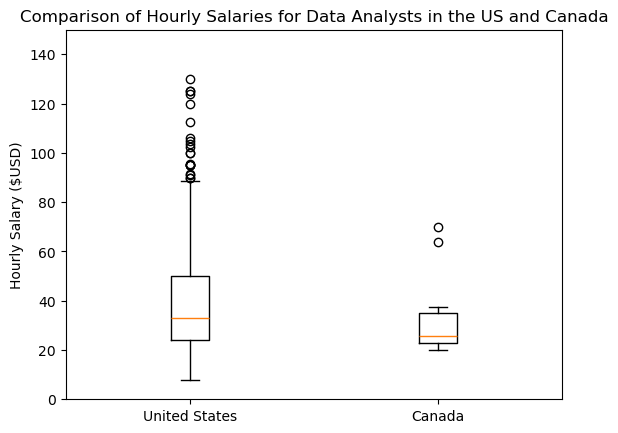

In [62]:
plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()